## **Caso 3** ##

### Agrupamiento con metodología asum-dm ###



1. **Entendimiento del negocio**  
2. **Entendimiento de los datos**  
3. **Preparación de los datos**  
4. **Modelado**  
5. **Evaluación**  
6. **Despliegue (conclusiones)**

In [4]:
# Tratamiento estructurado de datos
import pandas as pd
import numpy as np
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Advertencias
import warnings
warnings.filterwarnings('ignore')

### 1. Entendimiento del negocio

1. **Entendimiento:** La naviera quiere conocer las diferencias operacionales entre los barcos de su flota con el objetivo de mejorar las condiciones de trabajo de sus trabajadores y de la experiencia de los clientes de esta misma.

2. **Enfoque Analítico:** Queremos diseñar un metodo que nos permita agrupar correctamente los barcos, de manera subjetiva los técnicos creen que se pueden dividir en dos grupos, con el modelo buscamos afirmar o rechazar esta hipotisis justificando la desición.

3. **Requerimiento de Datos:** Se requieren *datos de los barcos y del transporte de mercancías*

4. **Recolección de Datos:** Los datos son brindados por en problema


### 2. Entendimiento de los datos 
- Identificar la existencia de datos nulos
- Exploración univariada de los datos
- Exploración multivariada de los datos
- Identificación de correlación y multicolinealidad

In [5]:
data = pd.read_csv('datos_caso_3.csv')
data

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,NaN,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


#### 1.1 Identificacion de tipos de variable y datos nulos 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [7]:
total = len(data)
nulos = data.isnull().sum()
porcentaje_nulos = (nulos / total) * 100
resumen_nulos = pd.DataFrame({'Nulos': nulos, 'Total': total, 'Porcentaje': porcentaje_nulos})
print(resumen_nulos)

                         Nulos  Total  Porcentaje
Date                         0   2736     0.00000
Ship_Type                  136   2736     4.97076
Route_Type                 136   2736     4.97076
Engine_Type                136   2736     4.97076
Maintenance_Status         136   2736     4.97076
Speed_Over_Ground_knots      0   2736     0.00000
Engine_Power_kW              0   2736     0.00000
Distance_Traveled_nm         0   2736     0.00000
Draft_meters                 0   2736     0.00000
Weather_Condition          136   2736     4.97076
Cargo_Weight_tons            0   2736     0.00000
Operational_Cost_USD         0   2736     0.00000
Revenue_per_Voyage_USD       0   2736     0.00000
Turnaround_Time_hours        0   2736     0.00000
Efficiency_nm_per_kWh        0   2736     0.00000
Seasonal_Impact_Score        0   2736     0.00000
Weekly_Voyage_Count          0   2736     0.00000
Average_Load_Percentage      0   2736     0.00000


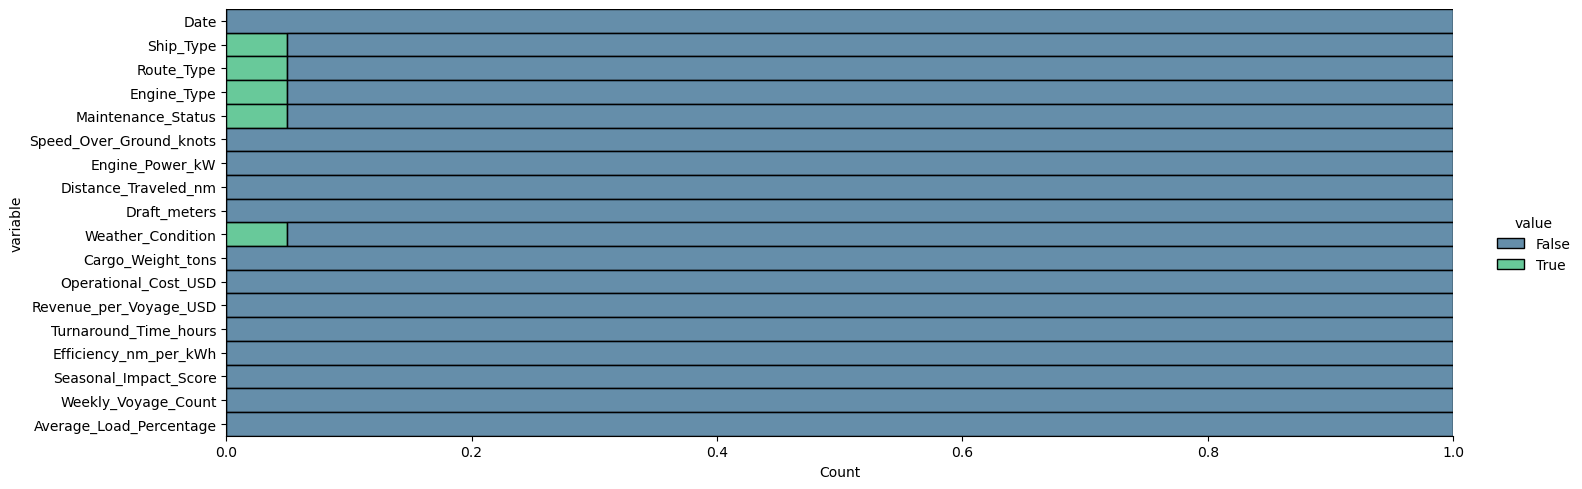

In [8]:
# Visualización de la existencia de datos nulos por variable
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=3))
plt.show()

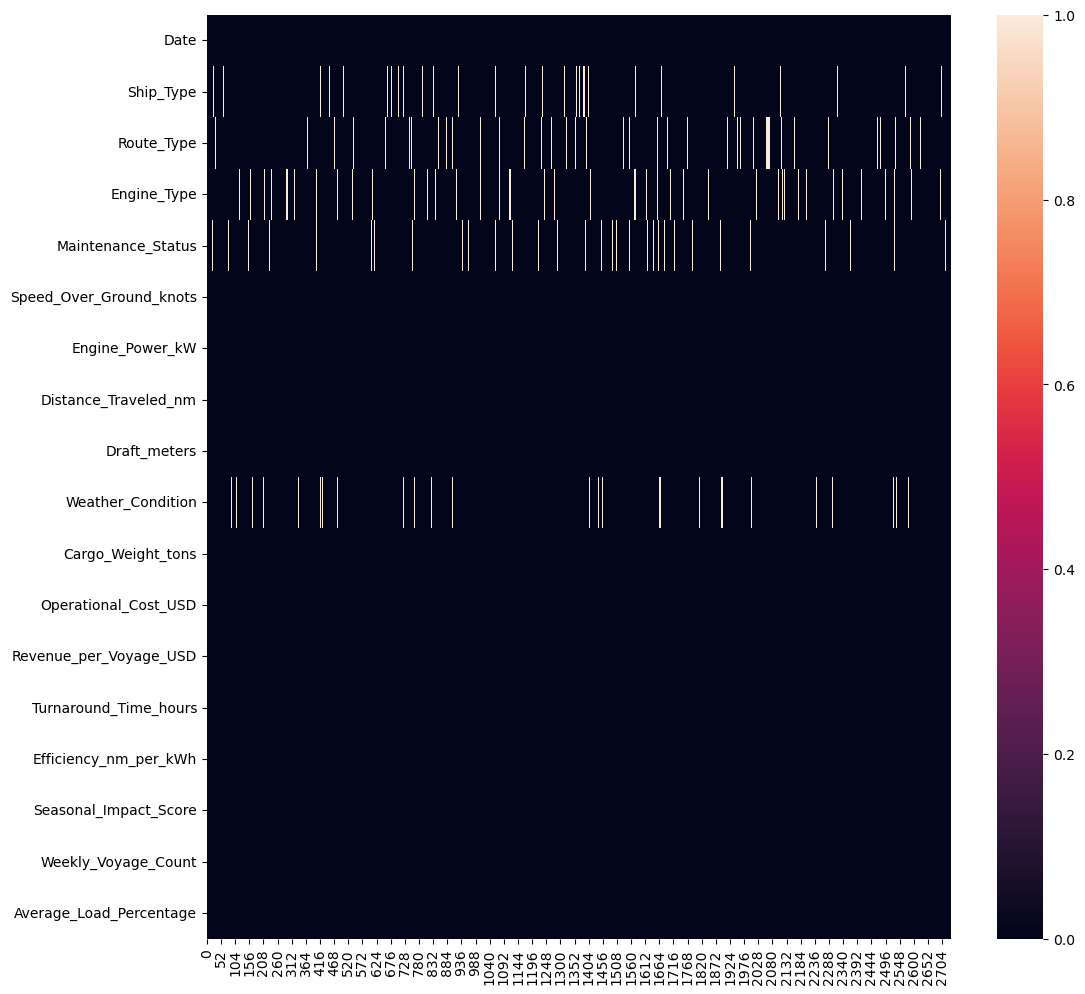

In [9]:
plt.figure(figsize=(12,12))
data.isnull().transpose().pipe(lambda df: sns.heatmap(data = df))
plt.show()

 #### 1.1. Exploración de los datos 
 ##### a. Variables númericas

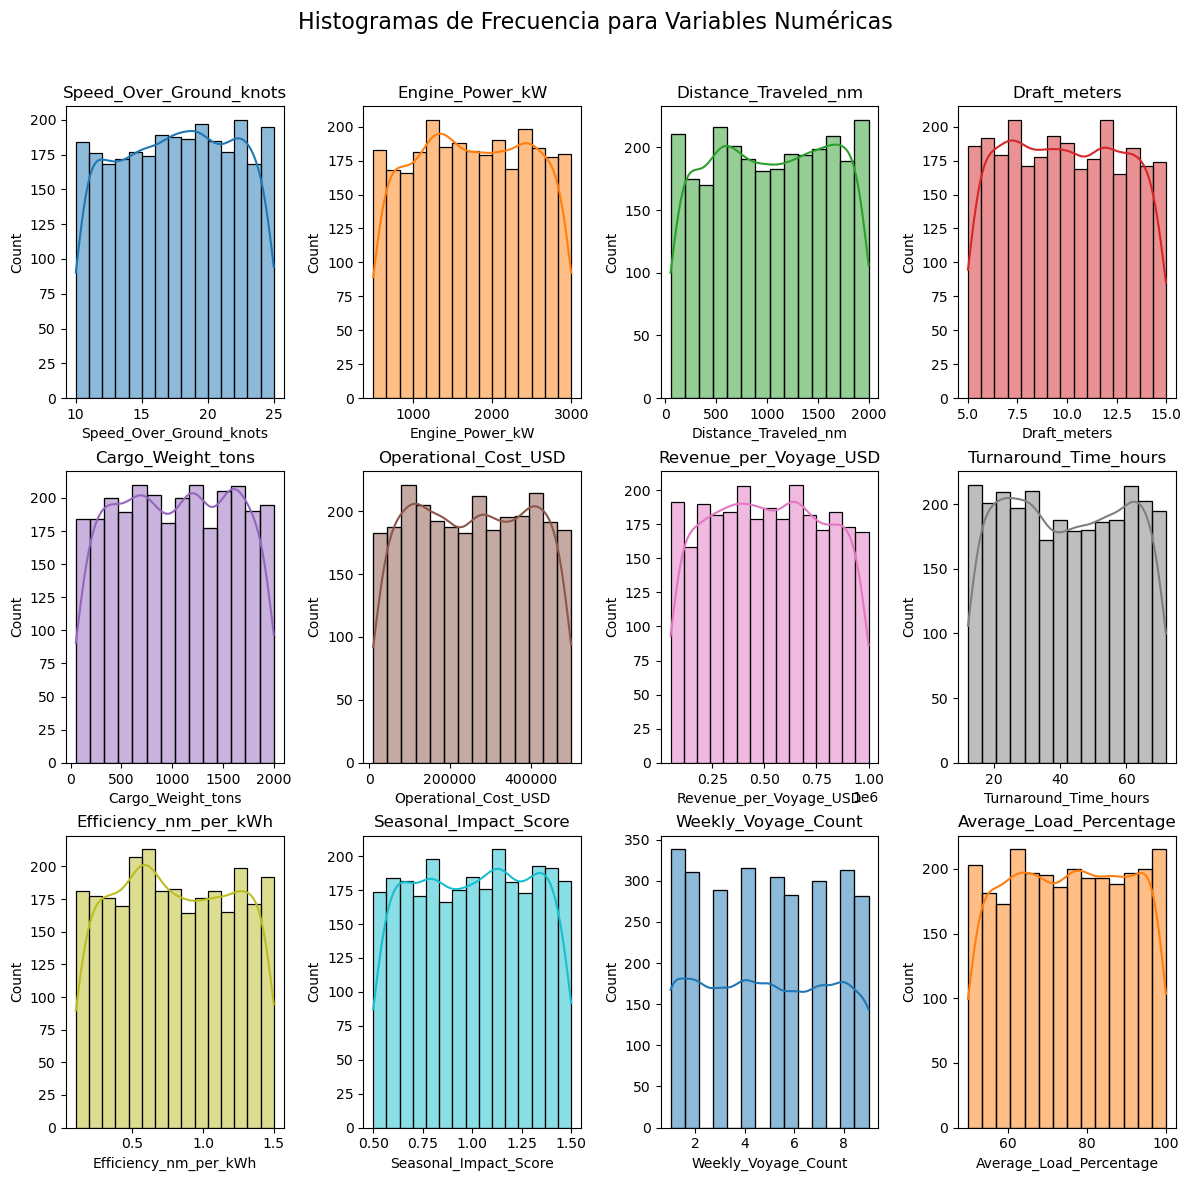

In [10]:

fig, ax = plt.subplots(3, 4, figsize=(12, 12))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.suptitle('Histogramas de Frecuencia para Variables Numéricas', fontsize=16)
plt.show()

##### b. Variables categoricas 

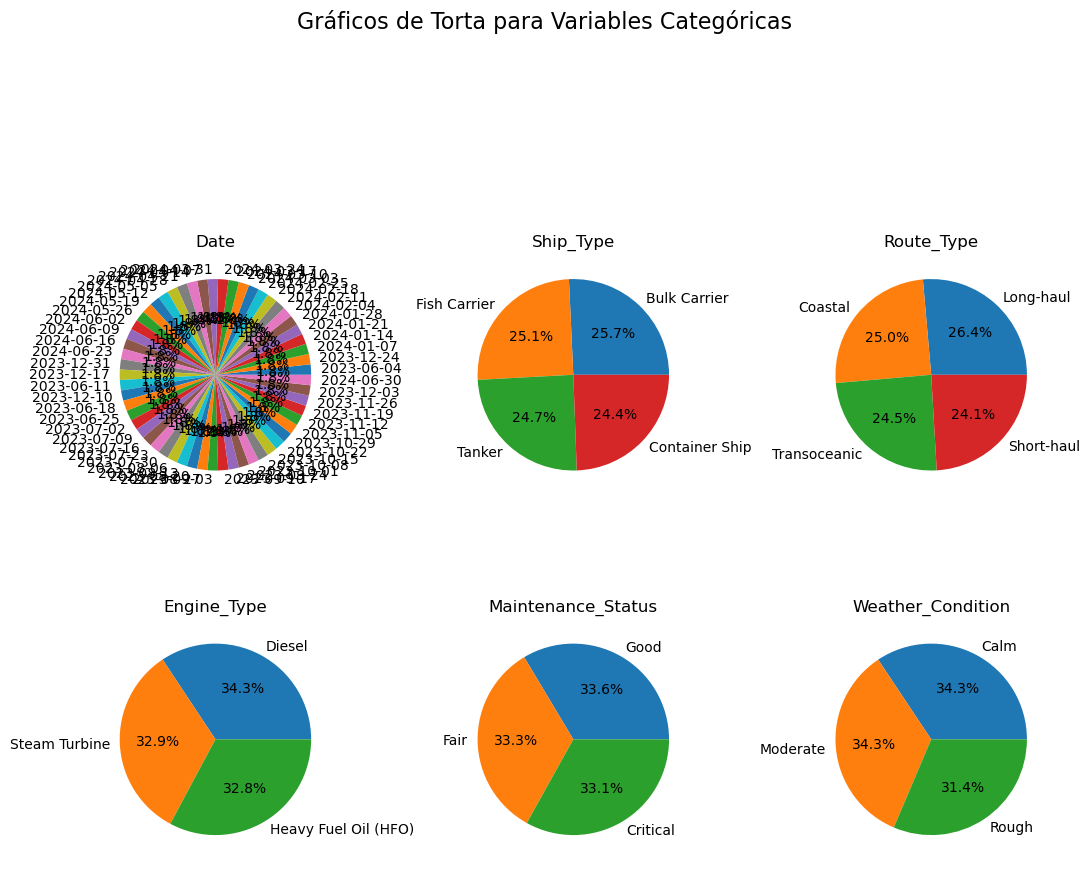

In [11]:
fig, ax = plt.subplots(2 , 3 , figsize=(11,11))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns

for i, col in enumerate(cat_col):
 ax[i].pie(x = data[col].value_counts(),
          labels = data[col].value_counts().index,
          autopct = '%.1f%%')
 ax[i].set_title(col)
 fig.tight_layout()
 fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

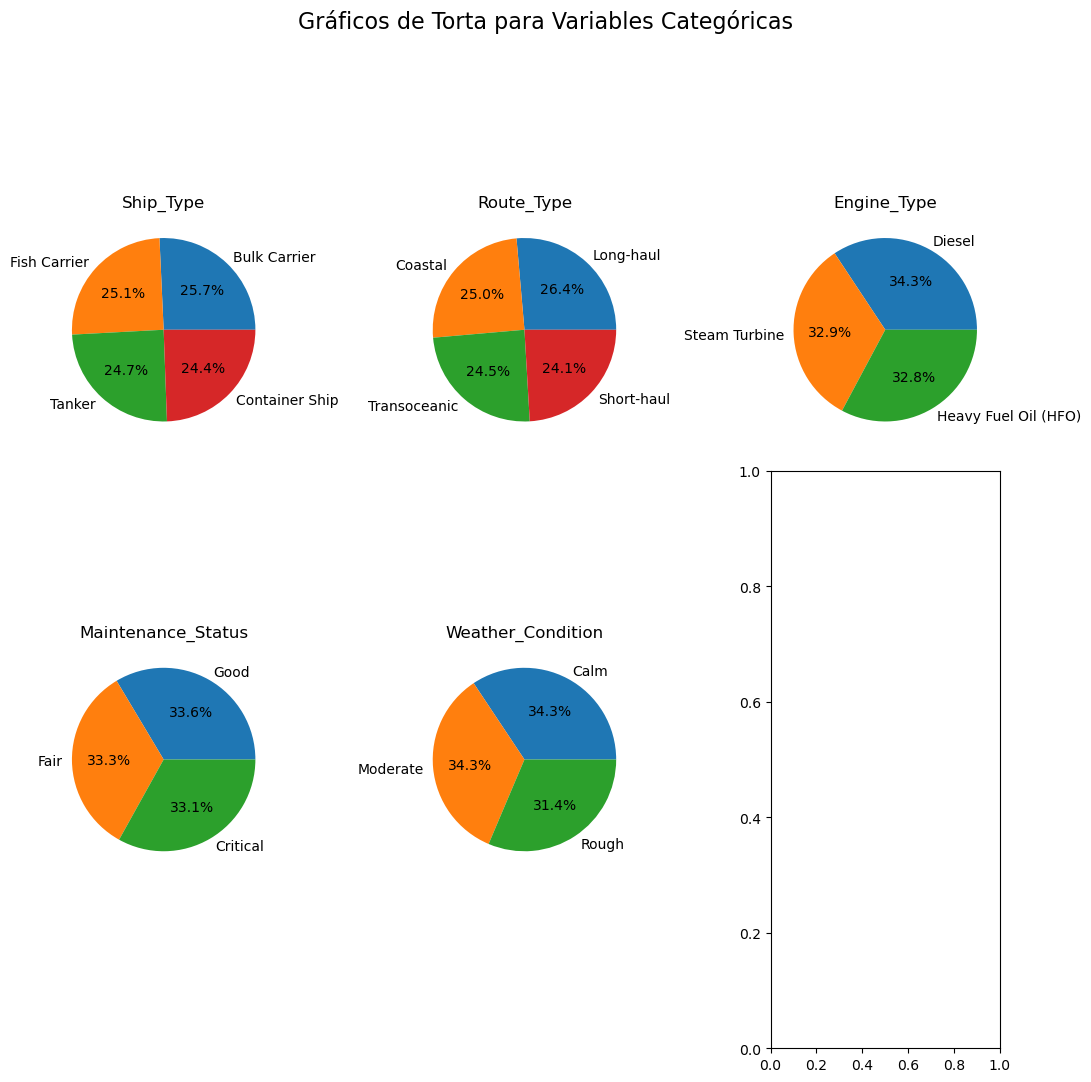

In [12]:
fig, ax = plt.subplots(2 , 3 , figsize=(11,11))
ax =ax.flat
cat_col2  = cat_col.drop(['Date'])  # Excluyendo la columna de fecha
for i, col in enumerate(cat_col2):
 ax[i].pie(x = data[col].value_counts(),
          labels = data[col].value_counts().index,
          autopct = '%.1f%%')
 ax[i].set_title(col)
 fig.tight_layout()
 fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

##### c. Análisis de correlación 

<function matplotlib.pyplot.show(close=None, block=None)>

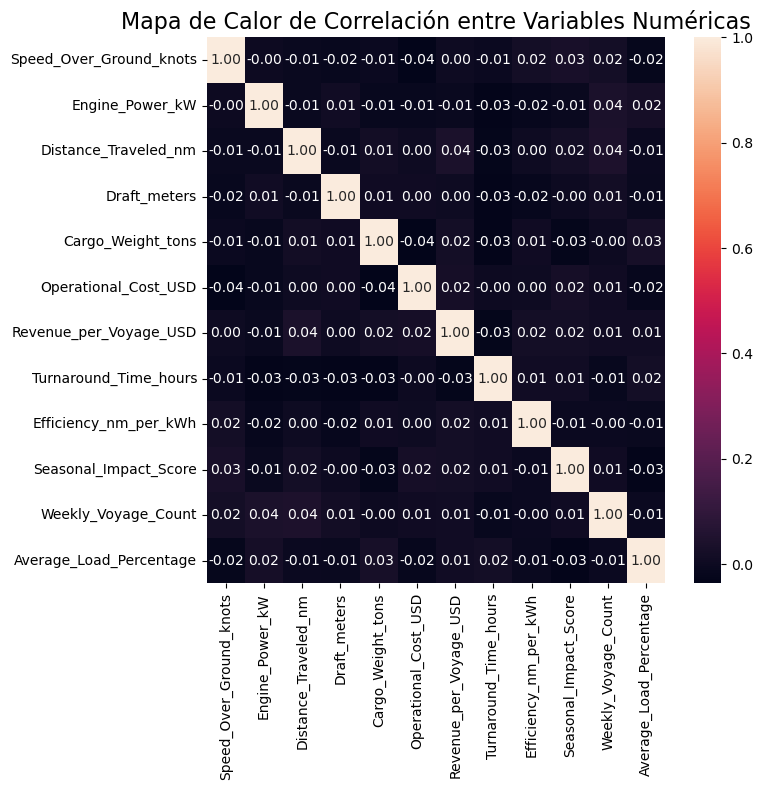

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data = data.corr(numeric_only=True), annot=True, fmt='.2f') #heatmap de correlación
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show

##### d. Conclusión del análisis exploratorio de los datos 

- Apartir de los histogramas de las variables númericas vemos que todas tienen un comportamiento razonable frente a los datos que representa cada una.

- Ninguna de las variables categoricas está desbalanceada, **vamos a eliminar fecha** ya que este no brinda información relevante para la agrupación de los datos 

- No hay correlaciones en las variables numericas, por ende lo eliminaremos ninguna por este criterio.

- Debemos quitar los registros nulos de las variables Ship_Type, Route_Type, Engine_Type, Maintenance_Status, Weather_Condition

### 3. Preparación de los datos 

#### 3.1 Drop de columnas y amputación de nulos

In [14]:
data_mod = data.drop(['Date'], axis=1)  # Eliminamos la columna de fecha 
data_mod = data_mod.dropna(subset=['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition'])  # Eliminamos registros nulos en variables categóricas
data_mod.head()
data_mod.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2127 non-null   object 
 1   Route_Type               2127 non-null   object 
 2   Engine_Type              2127 non-null   object 
 3   Maintenance_Status       2127 non-null   object 
 4   Speed_Over_Ground_knots  2127 non-null   float64
 5   Engine_Power_kW          2127 non-null   float64
 6   Distance_Traveled_nm     2127 non-null   float64
 7   Draft_meters             2127 non-null   float64
 8   Weather_Condition        2127 non-null   object 
 9   Cargo_Weight_tons        2127 non-null   float64
 10  Operational_Cost_USD     2127 non-null   float64
 11  Revenue_per_Voyage_USD   2127 non-null   float64
 12  Turnaround_Time_hours    2127 non-null   float64
 13  Efficiency_nm_per_kWh    2127 non-null   float64
 14  Seasonal_Impact_Score    2127

In [74]:
data['Date'] = pd.to_datetime(data['Date'])
dataDateTime = data.copy()
dataDateTime['Year'] = dataDateTime['Date'].dt.year
dataDateTime['Year'] = dataDateTime['Year'].astype('object')
dataModYear = dataDateTime.drop(['Date'], axis=1)  # Eliminamos la columna de fecha
dataModYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2600 non-null   object 
 1   Route_Type               2600 non-null   object 
 2   Engine_Type              2600 non-null   object 
 3   Maintenance_Status       2600 non-null   object 
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2600 non-null   object 
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_Impact_Score   

In [16]:
## verificamos si hay nulos en el nuevo dataset
total = len(data_mod)
nulos = data_mod.isnull().sum()
porcentaje_nulos = (nulos / total) * 100
resumen_nulos = pd.DataFrame({'Nulos': nulos, 'Total': total, 'Porcentaje': porcentaje_nulos})
print(resumen_nulos)

                         Nulos  Total  Porcentaje
Ship_Type                    0   2127         0.0
Route_Type                   0   2127         0.0
Engine_Type                  0   2127         0.0
Maintenance_Status           0   2127         0.0
Speed_Over_Ground_knots      0   2127         0.0
Engine_Power_kW              0   2127         0.0
Distance_Traveled_nm         0   2127         0.0
Draft_meters                 0   2127         0.0
Weather_Condition            0   2127         0.0
Cargo_Weight_tons            0   2127         0.0
Operational_Cost_USD         0   2127         0.0
Revenue_per_Voyage_USD       0   2127         0.0
Turnaround_Time_hours        0   2127         0.0
Efficiency_nm_per_kWh        0   2127         0.0
Seasonal_Impact_Score        0   2127         0.0
Weekly_Voyage_Count          0   2127         0.0
Average_Load_Percentage      0   2127         0.0


#### 3.2 Transformación de las variables 

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler #Onehot ya que no son normales 
from sklearn.pipeline import Pipeline

In [50]:
num_col =  data_mod.select_dtypes(include= [ 'int64','float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include= [ 'object']).columns.to_list()
# normalizamos las variables numéricas
numtrans = Pipeline(steps= [('caler', MinMaxScaler())])
# codificamos las variables categóricas, quedan más de una columna por variable
# por ejemplo Ship_Type tiene 4 tipos de barcos, entonces se crean 4 columnas
cattrans = Pipeline(steps= [('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('num', numtrans, num_col),
                                               ('cat', cattrans, cat_col)]
                                 , remainder='passthrough')

preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('caler', MinMaxScaler())]),
                                 ['Speed_Over_Ground_knots', 'Engine_Power_kW',
                                  'Distance_Traveled_nm', 'Draft_meters',
                                  'Cargo_Weight_tons', 'Operational_Cost_USD',
                                  'Revenue_per_Voyage_USD',
                                  'Turnaround_Time_hours',
                                  'Efficiency_nm_per_kWh',
                                  'Seasonal_Impact_Score',
                                  'Weekly_Voyage_Count',
                                  'Average_Load_Percentage']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Ship_Type', 'Route_Type', 'Engine_Type',
                                  'Maintenance_Status', 'Weather_Condition'])])

In [75]:
num_colYear =  dataModYear.select_dtypes(include= [ 'int64' ,'int32', 'float64']).columns.to_list()
cat_colYear = dataModYear.select_dtypes(include= [ 'object']).columns.to_list()
# normalizamos las variables numéricas

numtransYear = Pipeline(steps= [('caler', MinMaxScaler())])
# codificamos las variables categóricas, quedan más de una columna por variable
# por ejemplo Ship_Type tiene 4 tipos de barcos, entonces se crean 4 columnas
cattransYear = Pipeline(steps= [('encoder', OneHotEncoder())])

preprocessorYear = ColumnTransformer(transformers=[('num', numtransYear, num_colYear),
                                               ('cat', cattransYear, cat_colYear)]
                                 , remainder='passthrough')

preprocessorYear


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('caler', MinMaxScaler())]),
                                 ['Speed_Over_Ground_knots', 'Engine_Power_kW',
                                  'Distance_Traveled_nm', 'Draft_meters',
                                  'Cargo_Weight_tons', 'Operational_Cost_USD',
                                  'Revenue_per_Voyage_USD',
                                  'Turnaround_Time_hours',
                                  'Efficiency_nm_per_kWh',
                                  'Seasonal_Impact_Score',
                                  'Weekly_Voyage_Count',
                                  'Average_Load_Percentage']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Ship_Type', 'Route_Type', 'Engine_Type',
                                  'Maintenance_Status', 'Weather_Condition',
                                  'Year'])])

In [76]:
data_pre = preprocessor.fit_transform(data_mod)
data_pre

data_preYear = preprocessorYear.fit_transform(dataModYear)

In [80]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])
data_pro = pd.DataFrame(data_pre, columns=labels)

cod_catYear = preprocessorYear.named_transformers_['cat']['encoder'].get_feature_names_out(cat_colYear)
labelsYear = np.concatenate([num_colYear, cod_catYear])
data_proYear = pd.DataFrame(data_preYear, columns=labelsYear)
data_proYear.info()
data_proYear.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Speed_Over_Ground_knots           2736 non-null   float64
 1   Engine_Power_kW                   2736 non-null   float64
 2   Distance_Traveled_nm              2736 non-null   float64
 3   Draft_meters                      2736 non-null   float64
 4   Cargo_Weight_tons                 2736 non-null   float64
 5   Operational_Cost_USD              2736 non-null   float64
 6   Revenue_per_Voyage_USD            2736 non-null   float64
 7   Turnaround_Time_hours             2736 non-null   float64
 8   Efficiency_nm_per_kWh             2736 non-null   float64
 9   Seasonal_Impact_Score             2736 non-null   float64
 10  Weekly_Voyage_Count               2736 non-null   float64
 11  Average_Load_Percentage           2736 non-null   float64
 12  Ship_T

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,...,Maintenance_Status_Critical,Maintenance_Status_Fair,Maintenance_Status_Good,Maintenance_Status_nan,Weather_Condition_Calm,Weather_Condition_Moderate,Weather_Condition_Rough,Weather_Condition_nan,Year_2023,Year_2024
0,0.172666,0.625357,0.503367,0.913856,0.979420,0.967522,0.254676,0.230969,0.968493,0.916364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.025210,0.518488,0.518533,0.965983,0.057553,0.966615,0.877680,0.854481,0.135914,0.385945,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.716607,0.459434,0.312357,0.219929,0.065581,0.895451,0.361920,0.623798,0.285468,0.906517,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.736981,0.165847,0.552589,0.679323,0.865698,0.513144,0.039175,0.173291,0.430789,0.871380,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.249079,0.235695,0.716076,0.473014,0.107941,0.566997,0.659007,0.869660,0.879978,0.083444,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 4. Construcción del modelo 

#### 4.1 K-Means

##### K-Means DateDrop

##### 4.11 Inertia range (2,25) da

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 


def analyze_inertia(datos, rangoK, name = "dataFrame"):
    inertia = []
    for n_clusters in rangoK:
        kmeansModel = KMeans(n_clusters=n_clusters, 
                        n_init=20,
                        random_state = 123)
        kmeansModel.fit(datos)
        inertia.append(kmeansModel.inertia_)
    plt.figure(figsize=(6, 6))
    plt.plot(rangoK, inertia, marker='o')
    plt.xlabel('Número de Grupos')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()
                    
   

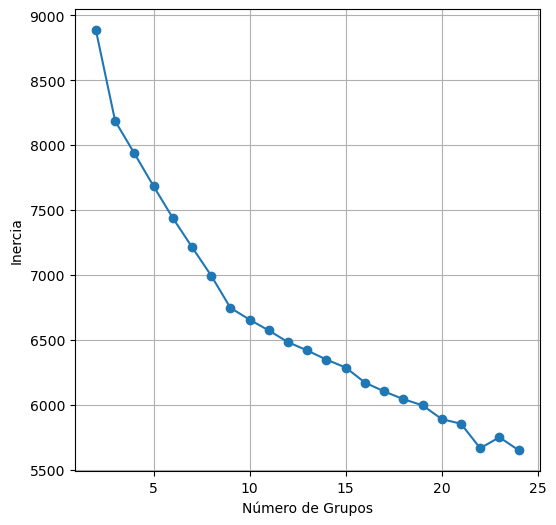

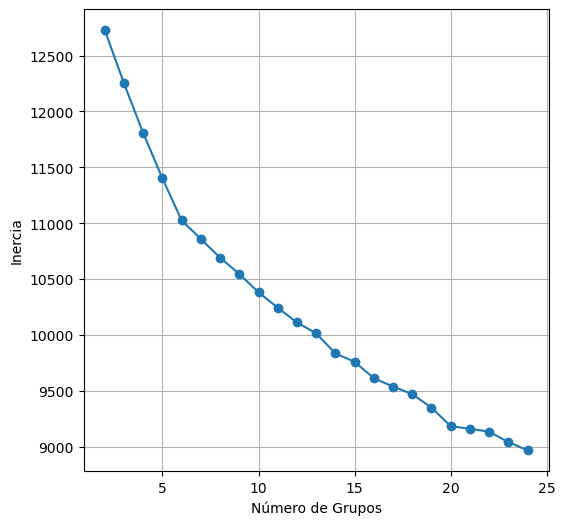

In [ ]:
analyze_inertia(data_pro, range(2, 25), name = "data_pro")
analyze_inertia(data_proYear, range(2, 25), name = "data_proYear")


##### 4.11.1 Inertia con SiloScore date drop

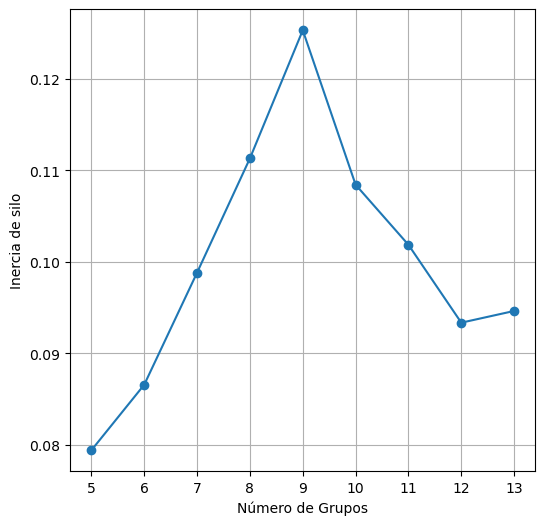

In [79]:

rangeKDefinido = range(5, 14) #Visualmente se ve que el mejor número de grupos es entre 5 y 12 acá se identifica el codo de la grafica
silScore = []

for n_clusters in rangeKDefinido:
    
    kmeansModel = KMeans(n_clusters=n_clusters, 
                    n_init=20,
                    random_state = 123)
    kmeansModel.fit(data_pro)
    clusterLables = kmeansModel.fit_predict(data_pro)
    silAvg = silhouette_score(data_pro, clusterLables)
    silScore.append(silAvg)

plt.figure(figsize=(6, 6))
plt.plot(rangeKDefinido, silScore, marker='o')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia de silo')
plt.grid()
plt.show()


##### 4.11.1 Inertia con SiloScore Años separados 

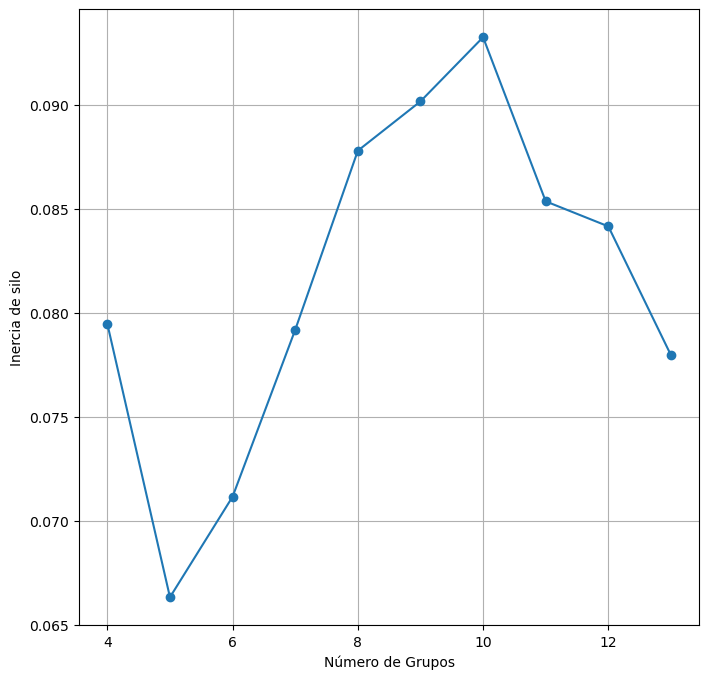

In [59]:
rangeKDefinido2 = range(4, 14) #Visualmente se ve que el mejor número de grupos es entre 5 y 12 acá se identifica el codo de la grafica
silScore2 = []

for n_clusters in rangeKDefinido2:
    
    kmeansModel = KMeans(n_clusters=n_clusters, 
                    n_init=20,
                    random_state = 123)
    kmeansModel.fit(data_proYear)
    clusterLables = kmeansModel.fit_predict(data_proYear)
    silAvg = silhouette_score(data_proYear, clusterLables)
    silScore2.append(silAvg)

plt.figure(figsize=(8, 8))
plt.plot(rangeKDefinido2, silScore2, marker='o')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia de silo')
plt.grid()
plt.show()


##### 4.11.2 Resultado del calculo de grupos para Kmeans
**Despúes de hacer el calculo de inertia de siloet vemos que el la cantidad de con mayor valor sería de 9 grupos
<br>
K = 9**

Este modelo vamos a hacerlo date time para extraer el año mea y día, todos por separado 

##### 4.11.3 ModeloFinal Date Drop

In [24]:
kmeansFinal = KMeans(n_clusters=9,
                    n_init=20,
                    random_state = 123)
kmeansFinal.fit(data_pro)

KMeans(n_clusters=9, n_init=20, random_state=123)

##### 4.12 Inertia solo con año


#### 4.2 Agrupamiento Jerarquico

##### a. Función de dibujo 

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

##### b. Afinidad por promedio

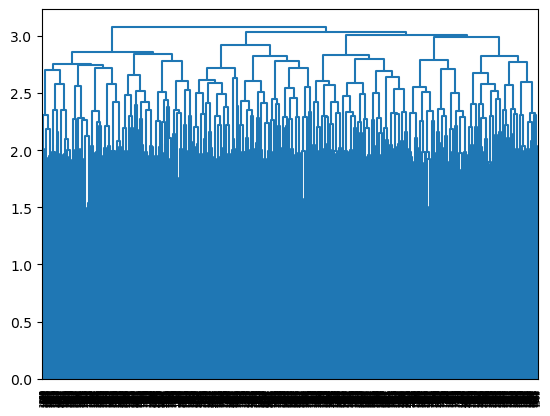

In [26]:
# Esta afinidad no nos servirá para definir los grupos pero se hace para comprar con la afinidad por varianza
h_cust_mean = AgglomerativeClustering(metric='euclidean',
                                      linkage='average',
                                      distance_threshold=0,
                                      n_clusters=None)
h_cust_mean.fit( X = data_pro)
dibujarDendrograma(h_cust_mean, color_threshold=0)

##### c. Afinidad por varianza

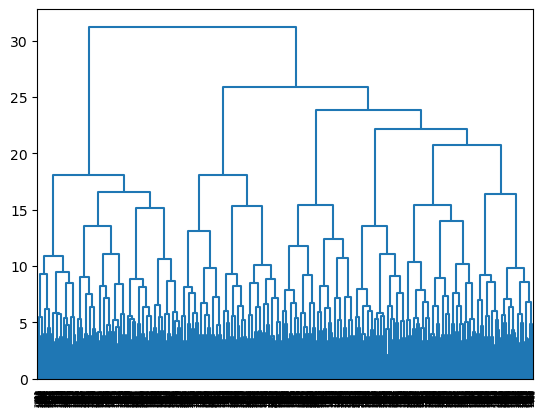

In [27]:
# Varizanza 

h_cust_ward = AgglomerativeClustering(metric='euclidean',
                                      linkage='ward',
                                      distance_threshold=0,
                                      n_clusters=None)
h_cust_ward.fit( X = data_pro)
dibujarDendrograma(h_cust_ward, color_threshold=0)

**Podemos ver que la vertical más larga es la de la izquierda y se divide en 2 aprox en y = 25**

##### d. Dendograma con partida de la vertical

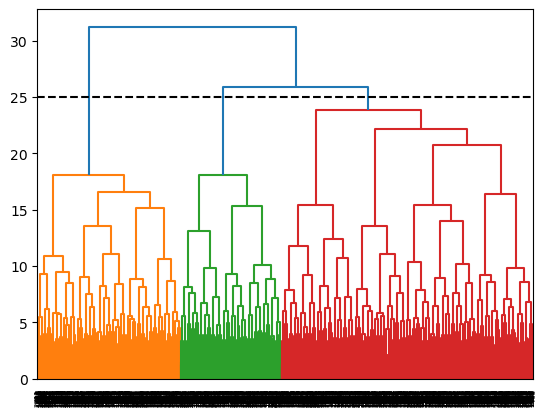

In [28]:
dendogranPrun = 25 
dibujarDendrograma(h_cust_ward, color_threshold=dendogranPrun)
plt.axhline(y=dendogranPrun, c = 'black', linestyle='--')
plt.show()

**Se evidencia que hay 3 grupos por la intersección con la horizontal**

##### e. Modelo jerarquico final 

In [29]:
hclustFinal = AgglomerativeClustering(metric='euclidean',
                                      linkage='ward',
                                      n_clusters=3)
hclustFinal.fit(data_pro)

AgglomerativeClustering(n_clusters=3)

#### 4.3 DBS

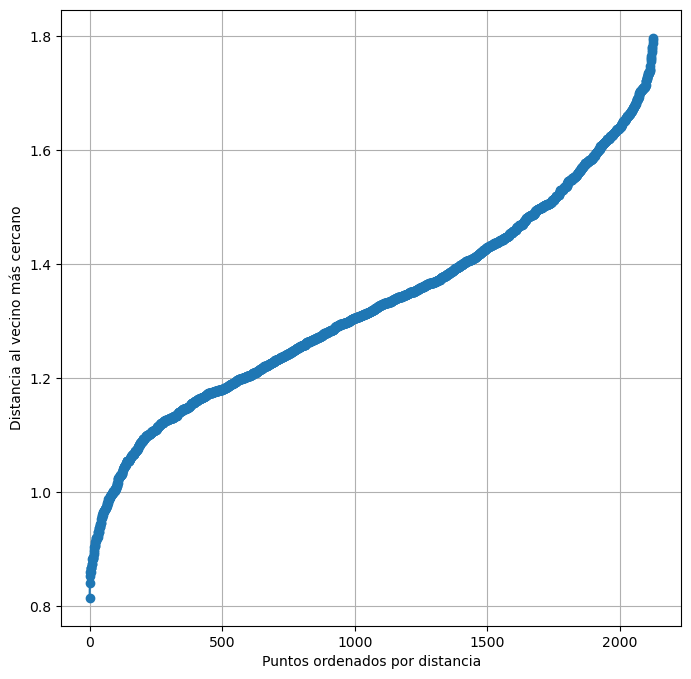

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 
from itertools import product

neighbours = NearestNeighbors(n_neighbors=3)
neighboursfit = neighbours.fit(data_pro)
distance, indices = neighboursfit.kneighbors(data_pro)
distance = np.sort(distance, axis=0)
distances = distance[:, -1]

plt.figure(figsize=(8, 8))
plt.plot(distances, marker='o')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.grid()
plt.show()

In [83]:
eps_values  = np.arange(1.4, 1.7, 0.1)
min_samples =  np.arange(1,10)
dbscan_params = list(product(eps_values, min_samples))
sil_score = []
for p in dbscan_params:
 y_pred = DBSCAN(eps = p[0], min_samples= p[1]).fit_predict(data_pro)
 sil_score.append(silhouette_score(data_pro, y_pred))

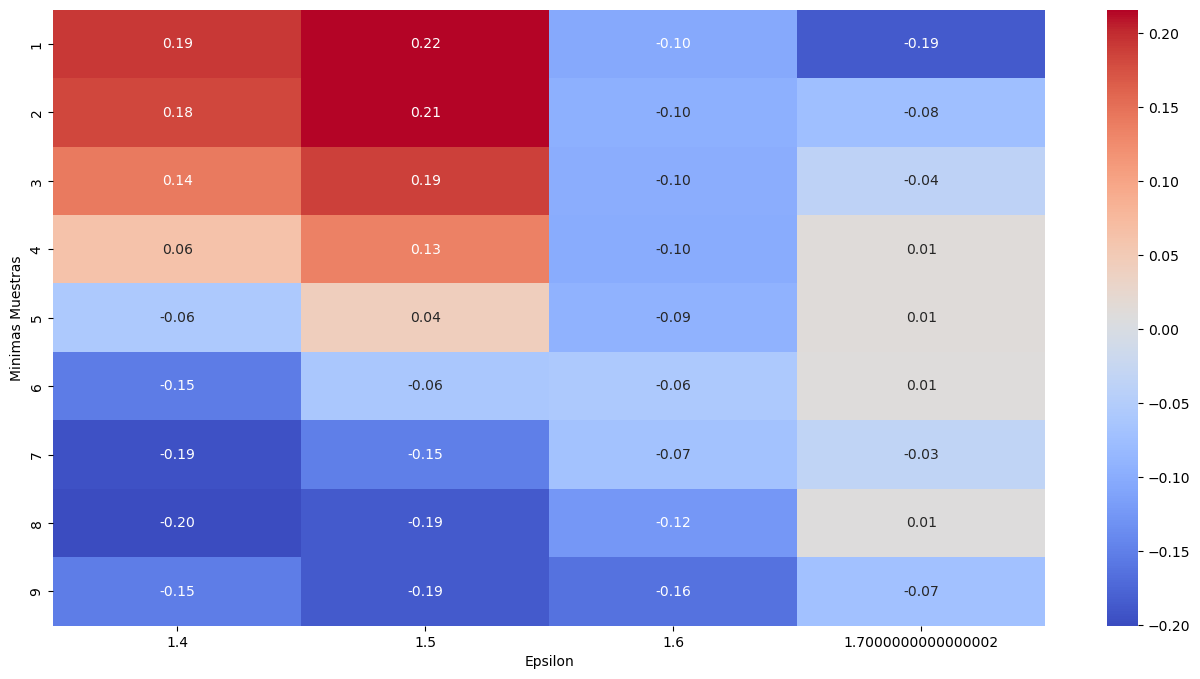

In [84]:
df_param_adj = pd.DataFrame.from_records(dbscan_params, columns=['Epsilon', 'Minimas Muestras'])
df_param_adj['Score'] = sil_score
pivot_data = pd.pivot_table(df_param_adj, values='Score', index= 'Minimas Muestras', columns='Epsilon')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='coolwarm') # viridis
plt.show()

**El mayor valor silo da en epsilo 1.6 con 9 muestras minimas**

In [85]:
dbscan_final = DBSCAN(eps= 1.5, min_samples= 3)
dbscan_final.fit(data_pro)

DBSCAN(eps=1.5, min_samples=3)

#### GMM

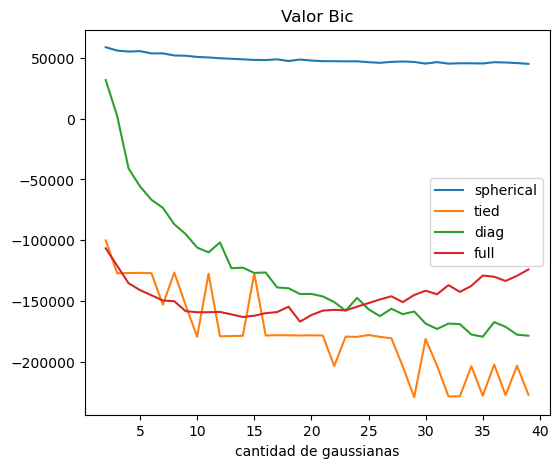

In [91]:
from sklearn.mixture import GaussianMixture

fig, ax = plt.subplots(figsize= (6,5))
n_gauss = range(2,40)
var_types = ['spherical', 'tied', 'diag', 'full' ]
for covariance_type in var_types:
 valor_bic = []
 for i in n_gauss:
  modelo = GaussianMixture(n_components= i, covariance_type = covariance_type)
  modelo = modelo.fit(data_pro)
  valor_bic.append(modelo.bic(data_pro))
 ax.plot(n_gauss, valor_bic, label = covariance_type)
 
ax.set_title('Valor Bic')
ax.set_xlabel('cantidad de gaussianas')
ax.legend()
plt.show()

Se puede ver que el tipo de covarianza que nos dio un menor Bic fue la 'tied' con 29 componentes 

In [92]:
gmm_final = GaussianMixture(n_components= 29, covariance_type= 'tied')
gmm_final.fit(data_pro)

GaussianMixture(covariance_type='tied', n_components=29)

### 5. Evaluación del modelo 
Tendremos en cuenta el valor del silo en cada uno de los modelos, para así poder determinar cual es el mejor modelo de agrupamiento para nuestro problema, la idea es elegir el mayor silo posible con un modelo que determine una cantidad razonable de grupos para poderlo aplicar a nuestro negocio 

In [93]:
labels_kmeans = kmeansFinal.predict(data_pro)
labels_hclust = hclustFinal.fit_predict(data_pro)
labels_dbscan = dbscan_final.fit_predict(data_pro)
labels_gmm = gmm_final.predict(data_pro)


In [94]:
sil_kmeans = silhouette_score(data_pro, labels_kmeans)
sil_hclust = silhouette_score(data_pro, labels_hclust)
sil_dbscan = silhouette_score(data_pro, labels_dbscan)
sil_gmm = silhouette_score(data_pro, labels_gmm)
# print de valores de silouete redondeados a 2 
print(f'SillScores')
print(f'kmeans: {round(sil_kmeans , 2)}')
print(f'Hclust: {round(sil_hclust , 2)}')
print(f'dbscan: {round(sil_dbscan , 2)}')
print(f'gmm: {round(sil_gmm , 2)}')

SillScores
kmeans: 0.13
Hclust: 0.05
dbscan: 0.19
gmm: 0.12


**El modelo con mayor silo es el dbscan**


In [95]:
np.unique(labels_dbscan)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

**Aunque este sea el modelo con mayor silo esta cantidad de grupos no sirve para nada para el agrupamiento de los grupos de la navira, entonces usaremos el segundo mejor en teminos de silo que sería el Kmeans**

In [ ]:
np.unique(labels_kmeans)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

**Verificamos que podemos usar el Kmeans con una cantidad rasonable de grupos nClusters=9**

In [96]:
data_pro['kmeans'] = labels_kmeans
data_pro


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,...,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Maintenance_Status_Critical,Maintenance_Status_Fair,Maintenance_Status_Good,Weather_Condition_Calm,Weather_Condition_Moderate,Weather_Condition_Rough,kmeans
0,0.025219,0.518350,0.518533,0.966277,0.057553,0.966614,0.877777,0.854481,0.136018,0.385945,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3
1,0.716864,0.459279,0.312357,0.219996,0.065581,0.895450,0.361960,0.623798,0.285686,0.906517,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4
2,0.737246,0.165608,0.552589,0.679530,0.865698,0.513139,0.039180,0.173291,0.431118,0.871380,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4
3,0.249169,0.235476,0.716076,0.473158,0.107941,0.566993,0.659079,0.869660,0.880651,0.083444,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4
4,0.574456,0.668767,0.345433,0.992633,0.955556,0.356328,0.765010,0.591406,0.908450,0.938453,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,0.950990,0.525326,0.050070,0.538327,0.718330,0.523370,0.811303,0.373858,0.434885,0.853635,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6
2123,0.376418,0.464834,0.577805,0.757122,0.205984,0.783703,0.544452,0.171164,0.182992,0.579627,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5
2124,0.106678,0.967826,0.097313,0.870945,0.137453,0.465401,0.717495,0.586004,0.643824,0.785504,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6
2125,0.875916,0.611297,0.292008,0.162386,0.052959,0.030929,0.789251,0.038624,0.569005,0.403271,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6


In [97]:
data_pro.kmeans.value_counts()

kmeans
4    270
2    251
7    247
6    240
3    229
0    228
8    226
1    221
5    215
Name: count, dtype: int64

### 6. Conclusiones 

1. **Hipotesis original:**
2. **Respuesta a hipotesis:** Hemos concluido por el analisis que el mejor modelo a usar es el K-means ya que es el modelo con el silo más alto y que al mismo tiempo nos genera una cantidad de grupos razonable para nuestro negocio en este método agrupamos los datos en 8 grupos, por lo cual vamos a rechazar la hipotesis original ya que separar solo en dos grupos no sería suficiente para hacer una caracterización relevante 
